# **Submission 1 - Predictive Analysis**

**Nama : Muhammad Daffa Eka Pramudita**
**<br>Email : mdaffa.ekapram@gmail.com**
**<br>ID Dicoding : dabrut**

## **Domain Proyek**

Diabetes merupakan penyakit kronis yang menjadi salah satu penyebab utama kematian dan pengeluaran biaya kesehatan yang tinggi secara global. Berdasarkan data dari World Health Organization (WHO), jumlah penderita diabetes meningkat secara signifikan dari tahun ke tahun. Deteksi dini dan penanganan yang tepat menjadi kunci utama dalam mencegah komplikasi yang lebih serius.

Dalam proyek ini, kami membangun model klasifikasi risiko diabetes berdasarkan berbagai parameter gaya hidup dan kesehatan seperti diet, tingkat stres, kepatuhan terhadap pengobatan, serta hidrasi. Tujuan utama dari proyek ini adalah untuk memprediksi tingkat risiko diabetes pada seseorang sehingga dapat dilakukan pencegahan atau pengobatan lebih dini.

## **Business Understanding**

### **Problem Statement**



1.   Bagaimana cara memanfaatkan informasi pola hidup guna memprediksi kategori diabetes pada seseorang?
2.   Apa faktor-faktor yang paling berkontribusi terhadap peningkatan risiko diabetes?



### **Goals**



1.   Membangun model klasifikasi untuk memprediksi risiko diabetes ke dalam tiga kategori: Low Risk, Moderate Risk, dan High Risk.
2.   Mengidentifikasi fitur-fitur gaya hidup yang memiliki kontribusi paling besar terhadap peningkatan risiko diabetes, berdasarkan hasil pemodelan machine learning.





### **Solution Statement**



1.   Menerapkan beberapa algoritma machine learning seperti Decision Tree, dan Random Forest. Serta membandingkan performa masing-masing model menggunakan metrik akurasi, precision, recall, dan f1-score.
2.   Menganalisis kontribusi setiap fitur input terhadap prediksi risiko diabetes.


# **Data Understanding**

Dataset yang digunakan diperoleh dari Kaggle dengan link : [Diabetes Prediction datasets](https://www.kaggle.com/datasets/kevintan701/diabetes-prediction-datasets). <br>Dataset ini berisi informasi terkait faktor-faktor gaya hidup dan kondisi kesehatan yang dapat memengaruhi risiko diabetes.

## **1. Import Library**

In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

Bagian ini bertujuan untuk mengimport library yang diperlukan untuk project kali ini

## **2. Data Loading**

Bagian ini bertujuan untuk memuat dataset yang akan digunakan. Dataset didapatkan dari kaggle

In [3]:
#!/bin/bash
!curl -L -o diabetes-prediction-datasets.zip\
  "https://www.kaggle.com/api/v1/datasets/download/kevintan701/diabetes-prediction-datasets"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 63821  100 63821    0     0   149k      0 --:--:-- --:--:-- --:--:--  149k


In [4]:
!unzip diabetes-prediction-datasets.zip -d diabetes-prediction-datasets

Archive:  diabetes-prediction-datasets.zip
  inflating: diabetes-prediction-datasets/diabetes_data.csv  


In [5]:
df = pd.read_csv('diabetes-prediction-datasets/diabetes_data.csv')

In [6]:
df = df.drop('user_id', axis=1)
df = df.drop('date', axis=1)

Pada bagian ini kita menghapus kolom `user_id` dan `date` karena fitur ini tidak memberikan pengaruh apapun terhadap model yang akan dibuat

In [7]:
df.head(10)

,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234
5,66.487946,173.934854,148.531748,3.290369,0,1,0,7.901651,0,22.0,32.012889
6,93.688192,178.951932,140.048219,39.720726,1,1,2,8.673952,1,29.3,30.069819
7,81.511521,176.351718,107.316455,0.000000,1,1,0,6.292043,1,26.2,33.000000
8,62.957884,180.495527,166.369827,51.653821,0,1,0,8.419547,1,19.3,12.086545
9,78.138401,164.647648,177.502806,20.577507,0,1,1,12.000000,1,28.8,46.826748


Disini kita menampilkan 10 data teratas untuk mengetahui struktur dari data yang dimiliki

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weight                1000 non-null   float64
 1   height                1000 non-null   float64
 2   blood_glucose         1000 non-null   float64
 3   physical_activity     1000 non-null   float64
 4   diet                  1000 non-null   int64  
 5   medication_adherence  1000 non-null   int64  
 6   stress_level          1000 non-null   int64  
 7   sleep_hours           1000 non-null   float64
 8   hydration_level       1000 non-null   int64  
 9   bmi                   1000 non-null   float64
 10  risk_score            1000 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 86.1 KB


Berdasarkan informasi yang diterima dataset ini memiliki **1000 baris** data dengan total **11 kolom**. Kemudian kita juga mengetahui bahwa setiap kolom bernilai numerik dan berperan sebagai berikut:

| Nama Kolom                    | Deskripsi                                                                                                                |
|------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| User ID (Dihapus)                     | Merupakan identitas unik yang diberikan kepada setiap pengguna untuk menjaga kerahasiaan data dan memudahkan pelacakan.  |
| Date (Dihapus)                        | Menunjukkan tanggal pencatatan data, yang mencerminkan bahwa data memiliki sifat deret waktu (time-series).              |
| Weight (kg)                  | Berat badan pengguna dalam kilogram. Berat badan berperan penting dalam menilai risiko obesitas dan diabetes.            |
| Height (cm)                  | Tinggi badan pengguna dalam sentimeter. Digunakan bersama berat badan untuk menghitung BMI, indikator risiko diabetes.   |
| Blood Glucose (mg/dL)        | Kadar gula dalam darah pengguna dalam mg/dL. Merupakan indikator utama dalam mendeteksi atau memantau kondisi diabetes.  |
| Physical Activity (minutes/day) | Lama aktivitas fisik harian pengguna dalam menit. Aktivitas fisik membantu mengontrol kadar gula darah.               |
| Diet Quality                 | Menunjukkan kualitas pola makan ('healthy' atau 'unhealthy') yang berpengaruh pada pencegahan dan pengelolaan diabetes.  |
| Medication Adherence         | Menggambarkan kepatuhan pengguna terhadap konsumsi obat, dikategorikan sebagai 'good' atau 'poor'.                       |
| Stress Level                 | Tingkat stres pengguna ('low', 'medium', atau 'high'). Stres kronis dapat berdampak negatif pada gula darah.             |
| Sleep Duration (hours)       | Jumlah jam tidur pengguna per hari. Tidur cukup membantu menjaga kesehatan dan kestabilan gula darah.                   |
| Hydration Status             | Menyatakan apakah pengguna terhidrasi dengan baik ('yes' atau 'no'). Hidrasi mendukung keseimbangan gula darah.         |
| BMI                          | Indeks Massa Tubuh yang dihitung dari berat dan tinggi badan, digunakan untuk menilai status berat badan pengguna.       |
| Risk Score                   | Skor risiko diabetes yang dihitung dari berbagai parameter kesehatan pengguna. Digunakan untuk pengelompokan tingkat risiko. |


In [9]:
print(df.describe())

            weight       height  blood_glucose  physical_activity  \
count  1000.000000  1000.000000    1000.000000        1000.000000   
mean     70.361797   170.795375     140.818899          30.294497   
std      14.467165     9.742934      38.064177          19.305165   
min      40.000000   150.000000      70.000000           0.000000   
25%      60.286145   163.937583     114.080015          15.251591   
50%      70.379509   170.630771     139.989969          30.003691   
75%      79.719158   177.288822     166.436613          43.338908   
max     120.000000   200.000000     297.049508          94.861859   

              diet  medication_adherence  stress_level  sleep_hours  \
count  1000.000000            1000.00000   1000.000000  1000.000000   
mean      0.604000               0.69300      0.950000     7.076312   
std       0.489309               0.46148      0.833183     1.883829   
min       0.000000               0.00000      0.000000     4.000000   
25%       0.000000     

Keterangan Kolom Statistik
*   `count`: Jumlah nilai non-null.
*   `mean`: Rata-rata dari nilai-nilai dalam kolom.
*   `std`: Standar deviasi, menunjukkan sebaran data dari nilai rata-rata.
*   `min`: Nilai minimum.
*   `25%`: Kuartil pertama (Q1) — 25% data berada di bawah nilai ini.
*   `50% (median)`: Kuartil kedua — nilai tengah dari data.
*   `75%`: Kuartil ketiga (Q3) — 75% data berada di bawah nilai ini.
*   `max`: Nilai maksimum.



# **3. Data Preparation**

## Memeriksa Missing Value

In [10]:
df.isnull().sum()

,0
weight,0
height,0
blood_glucose,0
physical_activity,0
diet,0
medication_adherence,0
stress_level,0
sleep_hours,0
hydration_level,0
bmi,0


Tidak terdapat missing value pada dataset ini

## Memeriksa Data Duplikat

In [11]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat data yang duplikat pada dataset ini

## Memeriksa Data Outlier

In [12]:
# Deteksi Outlier dengan metode IQR
def detect_outliers(data):
    outlier_summary = {}
    for column in data.select_dtypes(include=np.number).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_summary[column] = len(outliers)

    return outlier_summary

# Menjalankan fungsi untuk dataset (tanpa kolom target)
indicators_columns = df.drop(columns=['risk_score'], errors='ignore')
outlier_counts = detect_outliers(indicators_columns)

# Menampilkan jumlah outlier per kolom
print("Jumlah outlier per kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Jumlah outlier per kolom:
weight: 4
height: 2
blood_glucose: 6
physical_activity: 3
diet: 0
medication_adherence: 0
stress_level: 0
sleep_hours: 0
hydration_level: 0
bmi: 8


In [13]:
# Mengelompokkan fitur numerik kecuali kolom target 'risk_score'
indicators_feature = df.select_dtypes(include=np.number).drop(columns=['risk_score'], errors='ignore').columns

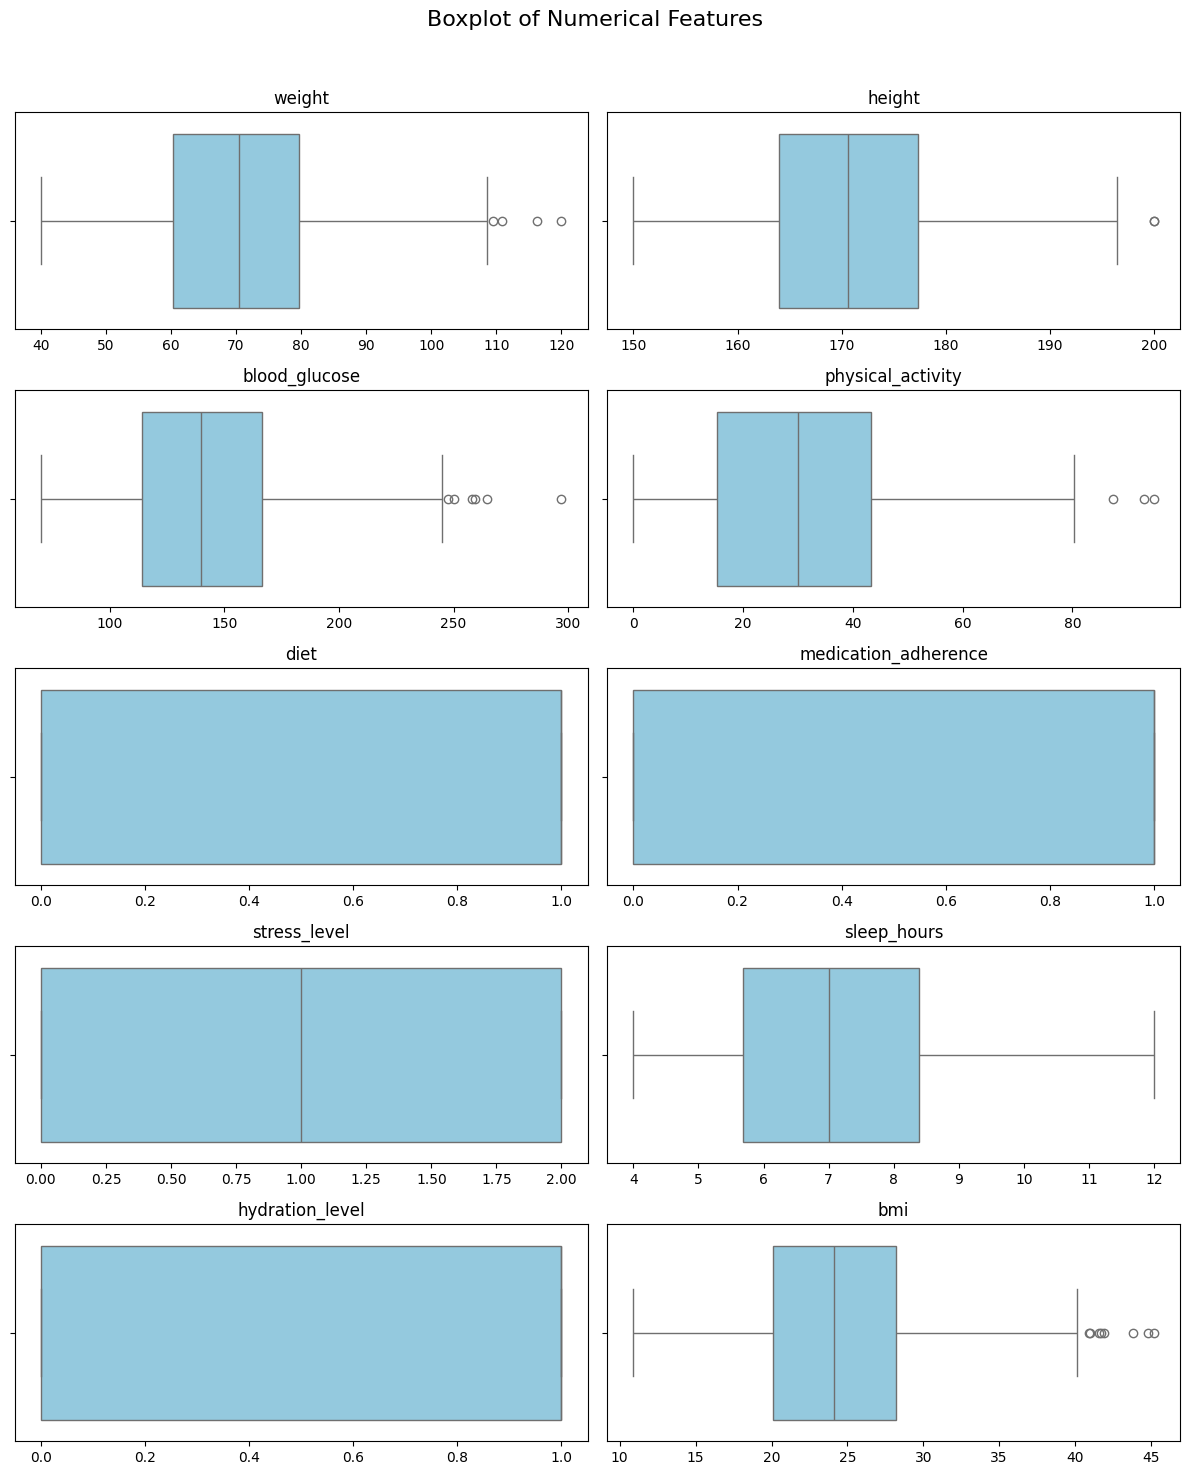

In [14]:
import math

# Hitung jumlah baris dan kolom dinamis (misalnya grid 4x2 atau 3x4 tergantung jumlah fitur)
n_features = len(indicators_feature)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# Buat grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 3))
fig.suptitle('Boxplot of Numerical Features', fontsize=16)

# Flatten axes supaya bisa di-loop
axes = axes.flatten()

# Plot tiap fitur
for i, feature in enumerate(indicators_feature):
    sns.boxplot(data=df, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Sembunyikan subplot kosong
for j in range(len(indicators_feature), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [15]:
import pandas as pd

# Inisialisasi DataFrame untuk outlier
outliers = pd.DataFrame()

# Loop semua kolom (karena semua numerik)
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ambil baris yang merupakan outlier
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers = pd.concat([outliers, outlier_rows], axis=0)

# Hilangkan duplikat baris jika satu baris adalah outlier di banyak kolom
outliers = outliers.drop_duplicates()

# Tampilkan hasil
print(f"Jumlah baris outlier terdeteksi: {len(outliers)}")
outliers.head()


Jumlah baris outlier terdeteksi: 22


,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
179,110.802537,158.964107,140.271994,40.312562,1,0,0,9.223397,1,43.8,49.921860
209,120.000000,187.495767,139.971656,39.024506,1,1,2,7.138736,0,34.1,45.243873
478,116.183212,161.125078,86.455768,53.071807,0,1,1,8.551293,1,44.8,41.732048
755,109.485731,183.736585,121.933621,0.000000,0,0,1,9.245784,1,32.4,78.000000
615,71.938318,200.000000,166.733620,44.692751,1,1,1,5.322660,1,18.0,23.826812


Berdasarkan informasi yang diberikan data ini mendapatkan total 22 outlier, dapat disimpulkan bahwa beberapa kolom dalam dataset yang mengandung nilai outlier seperti.
*   Kolom `weight` memiliki 4 outlier, yang kemungkinan merepresentasikan individu dengan berat badan yang sangat rendah atau sangat tinggi dibandingkan populasi umum.
*   Kolom `height` juga menunjukkan adanya 2 data yang menyimpang, bisa berasal dari individu yang sangat pendek atau sangat tinggi.
*   Kolom `physical_activity` memiliki 3 outlier, yang dapat mencerminkan pengguna dengan tingkat aktivitas fisik harian yang jauh lebih rendah atau lebih tinggi dari mayoritas.
*   Kolom `blood_glucose` memiliki 6 outlier, yang menunjukkan adanya kadar gula darah yang sangat rendah atau sangat tinggi.
*   Kolom `bmi` mamiliki 8 outlier. Nilai-nilai BMI ekstrem ini dapat mengindikasikan masalah berat badan serius, seperti obesitas parah atau kekurangan gizi.


## **Data Cleansing**

### Menangani Data Duplikat

In [16]:
df_clean = df.drop_duplicates()

### Menangani Data Outlier

In [17]:
# Fungsi untuk menghapus outlier dengan metode IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Hapus outlier
df_clean = remove_outliers(df_clean, indicators_feature)

# Tampilkan informasi perubahan
print("Outlier Berhasil Dihapus")


Outlier Berhasil Dihapus


In [18]:
print(f"Jumlah baris sebelum data cleansing: {df.shape[0]}")
print(f"Jumlah baris sesudah data cleansing: {df_clean.shape[0]}")

Jumlah baris sebelum data cleansing: 1000
Jumlah baris sesudah data cleansing: 979


Dataset dibersihkan dari data null, duplicate, dan juga outlier. Jumlah data setelah dicleaning menjadi **979** dari **1000** data

# **4. EDA**

### **Univariative Analysis**

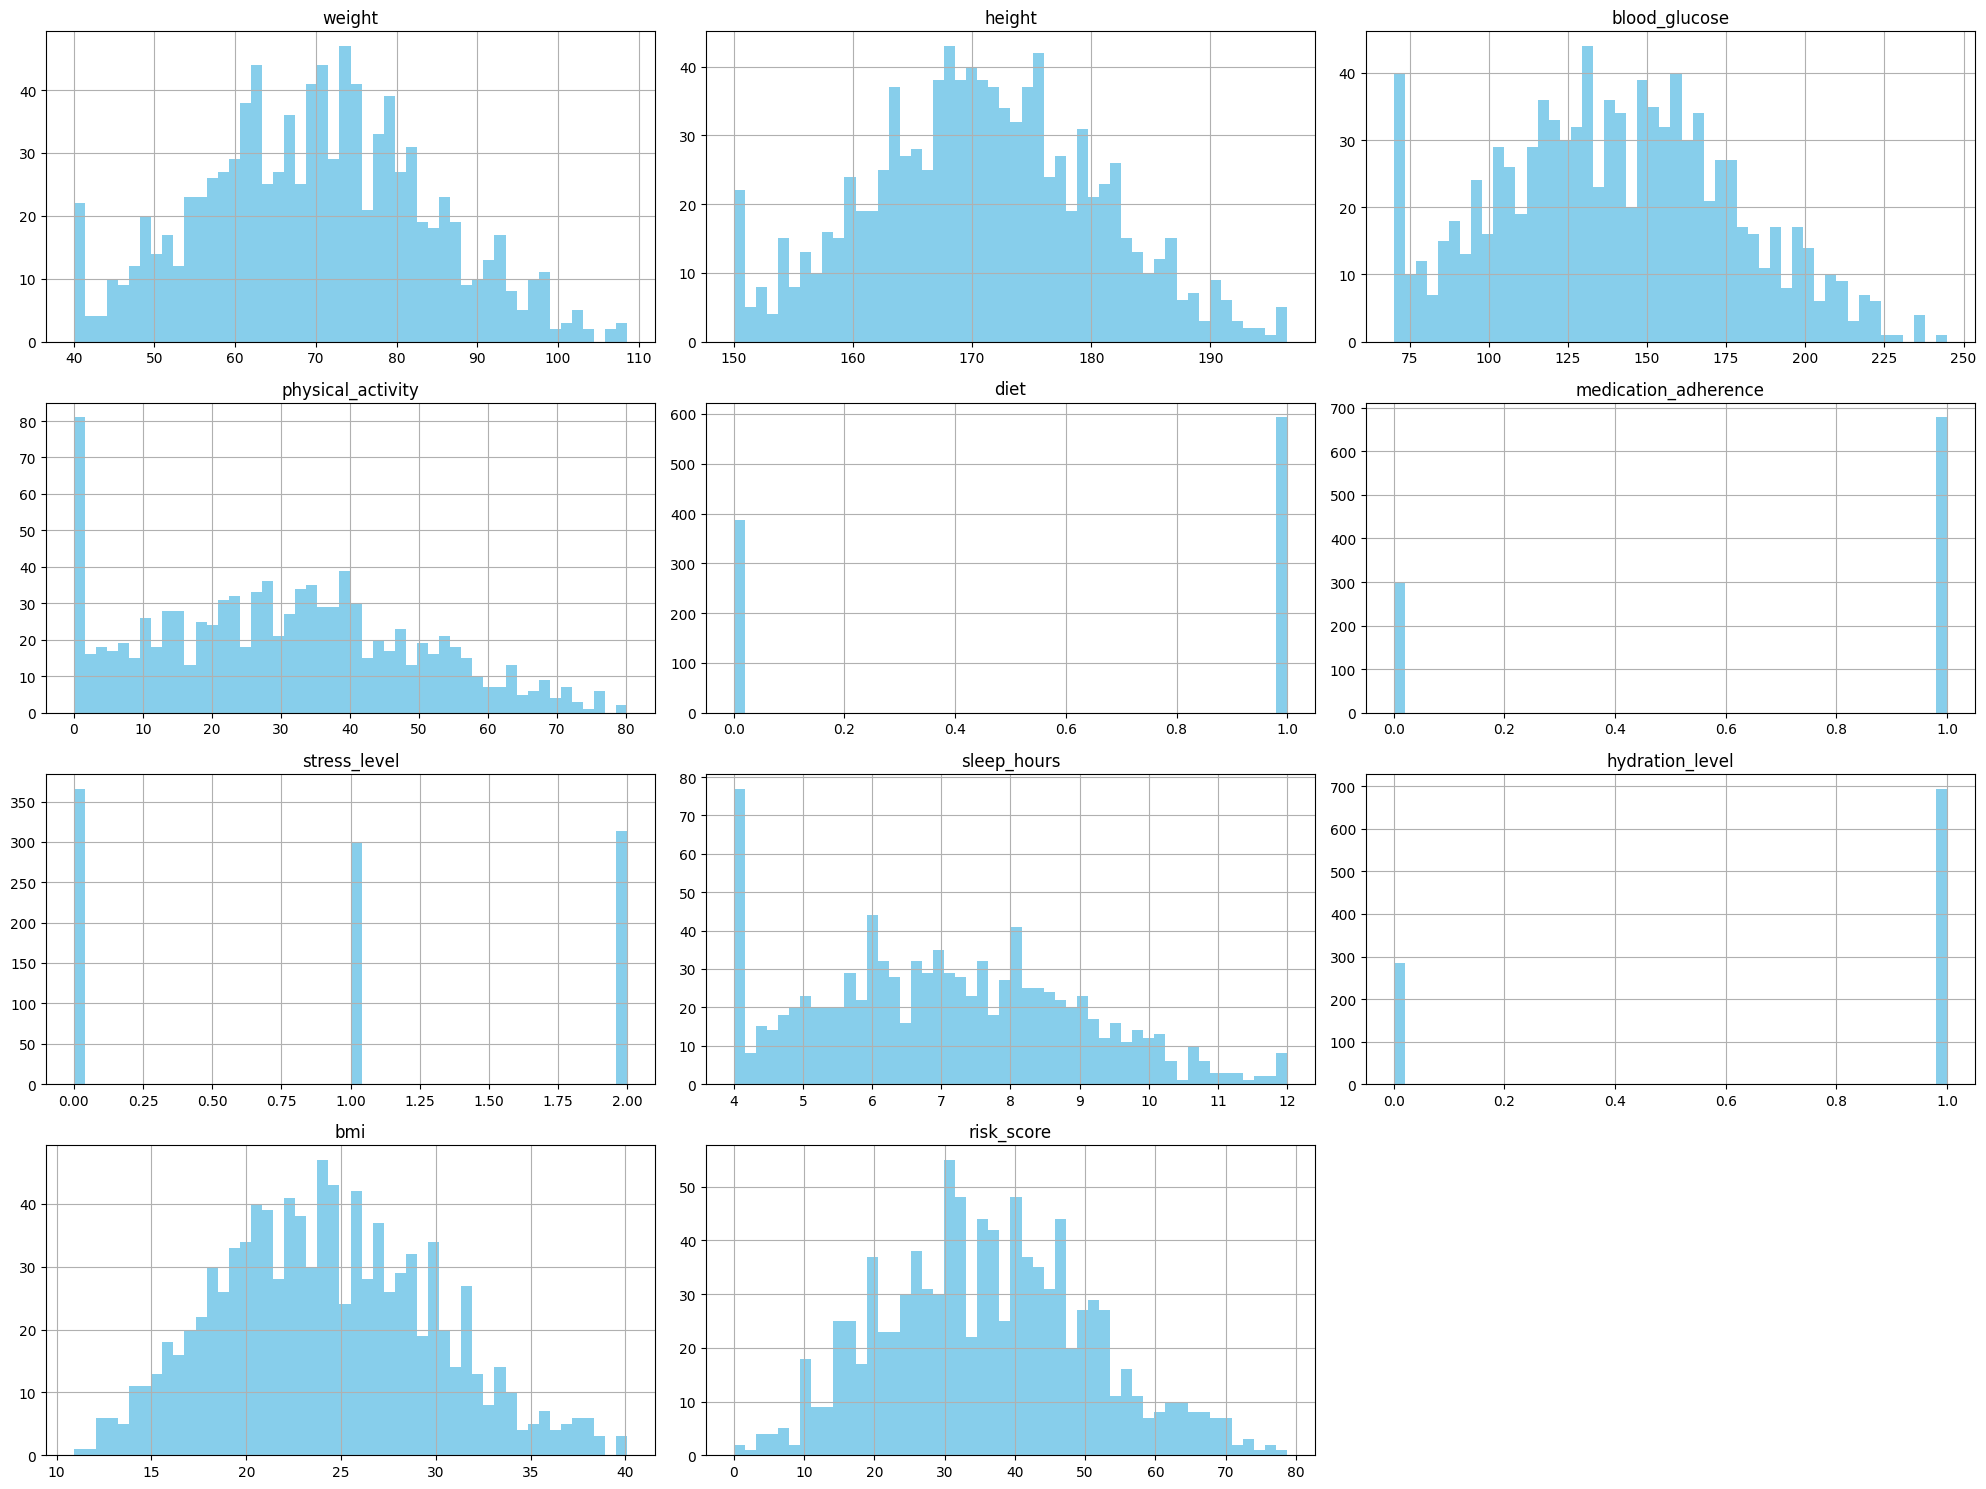

In [19]:
df_clean.hist(bins=50, figsize=(20,15), color= 'skyblue')

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

#menampilkan plot
plt.show()

Dari visualisasi diatas dapat diinterpretasikan bahwa :
*   `Weight`: mayoritas 50-90 kg, puncak 65-70 kg.
*   `Height`: mayoritas 160-180 cm, puncak 170-175 cm.
*   `Blood_glucose`:  mayoritas 120-160.
*   `Physical_activity`: mayoritas memiliki aktivitas fisik rendah.
*   `Diet`: mayoritas menerapkan diet yang sehat.
*   `Medication_adherence`: mayoritas patuh (nilai 1).
*   `Stress_level`: mayoritas memiliki tingkat stres sangat rendah.
*   `Sleep_hours`: mayoritas tidur 6-8 jam, puncak 7-7.5 jam.
*   `Hydration_level`: mayoritas memiliki tingkat hidrasi yang cukup.
*   `BMI`: mayoritas 20-30.
*   `Risk_score`: mayoritas 25-45.

Kesimpulan Umum:
*   Beberapa variabel seperti `weight`, `height`, dan `bmi` berdistribusi cukup simetris/normal.
*   Beberapa variabel seperti `physical_activity`, `stress_level` sangat miring ke kanan, menunjukkan mayoritas pada nilai rendah.

### **Multivariative Analysis**

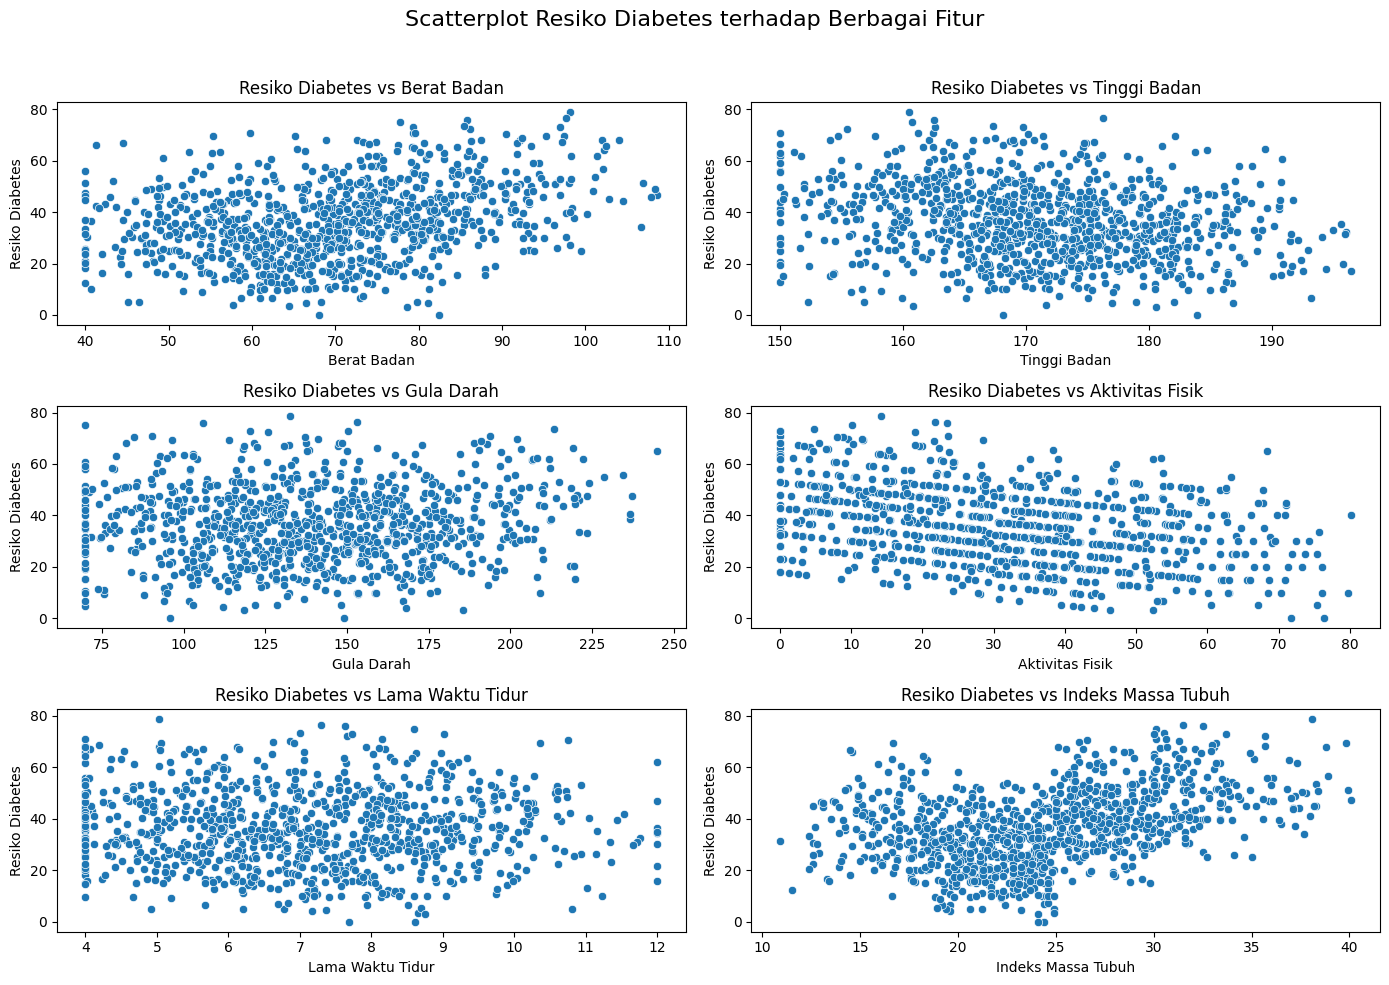

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dan axes 2x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.suptitle("Scatterplot Resiko Diabetes terhadap Berbagai Fitur", fontsize=16)

# Flatten axes untuk looping
axes = axes.flatten()

# Daftar fitur yang akan dibandingkan dengan risk_score
features = ['weight', 'height', 'blood_glucose', 'physical_activity', 'sleep_hours', "bmi"]
titles = [
    "Berat Badan", "Tinggi Badan", "Gula Darah", "Aktivitas Fisik", "Lama Waktu Tidur", "Indeks Massa Tubuh"
]

# Buat scatterplot di setiap subplot
for i, feature in enumerate(features):
    sns.scatterplot(data=df_clean, x=feature, y='risk_score', ax=axes[i])
    axes[i].set_title(f"Resiko Diabetes vs {titles[i]}")
    axes[i].set_xlabel(titles[i])
    axes[i].set_ylabel("Resiko Diabetes")

# Tata letak agar tidak saling tumpang tindih
plt.tight_layout(rect=[0, 0, 1, 0.96])  # reservasi space untuk judul utama
plt.show()


*   **Risiko Diabetes vs Berat Badan**:
   *   Tidak ada pola linear atau korelasi yang jelas terlihat. Titik-titik tersebar acak, menunjukkan bahwa secara individual, berat badan dan tinggi badan saja tidak menunjukkan hubungan linear yang kuat dengan risiko diabetes dalam dataset ini.

*   **Risiko Diabetes vs Tinggi Badan:**
   *   Mirip dengan berat badan, tidak ada pola linear yang jelas. Titik-titik tersebar secara acak. Tidak ada hubungan linear yang kuat antara tinggi badan dan risiko diabetes.

*   **Risiko Diabetes vs Gula Darah:**
   *   Terdapat korelasi yang terlihat, meski dengan penyebaran yang cukup luas. Semakin tinggi kadar gula darah, cenderung semakin tinggi pula risiko diabetes. Hal ini konsisten dengan fakta medis, namun menunjukkan bahwa gula darah bukan satu-satunya penentu risiko.

*   **Risiko Diabetes vs Aktivitas Fisik:**
   *   Ada indikasi korelasi lemah. Sedikit kecenderungan risiko diabetes menurun seiring peningkatan aktivitas fisik. Namun, ini masih sangat samar dan menunjukkan pengaruh yang tidak kuat secara individual dalam plot ini.

*   **Risiko Diabetes vs Lama Waktu Tidur:**
   *   Tidak ada pola linear atau korelasi yang jelas. Titik-titik tersebar acak, mengindikasikan bahwa jumlah jam tidur secara langsung tidak menunjukkan hubungan linear yang signifikan dengan risiko diabetes di data ini.

*   **Risiko Diabetes vs Indeks Massa Tubuh (BMI):**
   *   Menunjukkan korelasi positif yang paling jelas di antara semua fitur. Peningkatan BMI cenderung berkorelasi dengan peningkatan risiko diabetes. Ini sangat sesuai dengan bukti ilmiah bahwa BMI tinggi adalah faktor risiko utama diabetes. Meskipun demikian, masih ada variasi risiko pada setiap tingkat BMI.

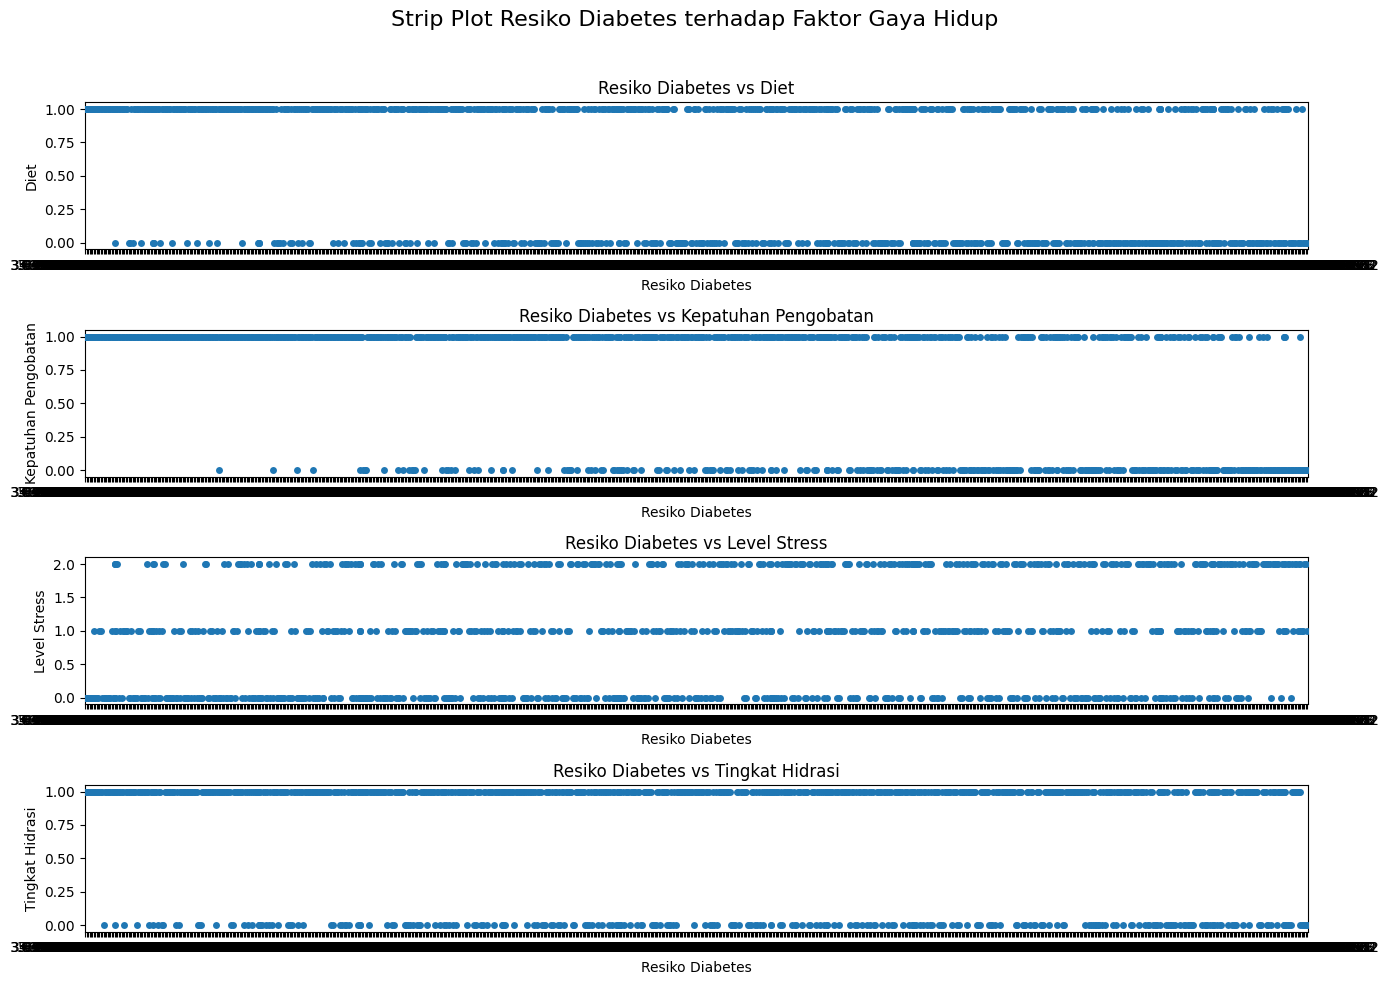

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur kategorikal yang akan divisualisasikan
features = ['diet', 'medication_adherence', 'stress_level', 'hydration_level']
titles = ['Diet', 'Kepatuhan Pengobatan', 'Level Stress', 'Tingkat Hidrasi']

# Membuat figure dan axes 4 baris, 1 kolom
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 10))
fig.suptitle("Strip Plot Resiko Diabetes terhadap Faktor Gaya Hidup", fontsize=16)

# Buat stripplot untuk setiap fitur
for i, feature in enumerate(features):
    sns.stripplot(data=df_clean, x='risk_score', y=feature, ax=axes[i])
    axes[i].set_title(f"Resiko Diabetes vs {titles[i]}")
    axes[i].set_xlabel("Resiko Diabetes")
    axes[i].set_ylabel(titles[i])

# Tata letak agar rapi
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


*   Risiko Diabetes vs Diet:
   *   Sebagian besar orang dalam data ini memiliki pola diet "sehat" (nilai 1). Baik individu dengan diet sehat maupun tidak sehat tersebar di seluruh rentang risiko diabetes. Tidak terlihat korelasi linear langsung antara jenis diet dan skor risiko.

*   Risiko Diabetes vs Kepatuhan Pengobatan:
   *   Mayoritas besar partisipan sangat patuh minum obat (nilai 1). Seperti diet, tidak ada pola linear yang jelas antara kepatuhan dan risiko diabetes dari plot ini.

*   Risiko Diabetes vs Level Stres:
   *   Kebanyakan orang memiliki level stres rendah (0 atau 1), dengan sebagian kecil di level lebih tinggi (2). Individu dari semua level stres tersebar di seluruh rentang risiko diabetes. Tidak ada hubungan linear yang tampak.

*   Risiko Diabetes vs Tingkat Hidrasi:
   *   Hampir semua individu dalam dataset memiliki tingkat hidrasi yang "cukup" (nilai 1). Karena sangat sedikit data untuk "hidrasi kurang" (nilai 0), sulit menarik kesimpulan kuat tentang hubungannya dengan risiko diabetes.

# **4. Modelling**

## Data Spliting

In [22]:
# Kategorisasi risk_score menjadi label klasifikasi
def categorize_risk(score):
    if score < 35:
        return 'low risk'
    elif 35 <= score < 60:
        return 'moderate risk'
    else:
        return 'high risk'

df_clean['risk_category'] = df_clean['risk_score'].apply(categorize_risk)

In [23]:
low_risk_count = df_clean['risk_category'].value_counts().get('low risk', 0)
moderate_risk_count = df_clean['risk_category'].value_counts().get('moderate risk', 0)
high_risk_count = df_clean['risk_category'].value_counts().get('high risk', 0)

print(f"Jumlah data dengan kategori Low Risk: {low_risk_count}")
print(f"Jumlah data dengan kategori Moderate Risk: {moderate_risk_count}")
print(f"Jumlah data dengan kategori High Risk: {high_risk_count}")

Jumlah data dengan kategori Low Risk: 470
Jumlah data dengan kategori Moderate Risk: 442
Jumlah data dengan kategori High Risk: 67


Bagian ini berfungsi untuk mengubah nilai numerik dari kolom risk_score menjadi kategori kelas klasifikasi.
Kategorinya dibagi menjadi tiga:
*  Low Risk: Skor di bawah 35
*  Moderate Risk: Skor antara 35 hingga kurang dari 60
*  High Risk: Skor 60 atau lebih

Setelah dilakukan pembagian, outputnya menunjukkan:
*  470 data termasuk kategori Low Risk
*  442 data kategori Moderate Risk
*  67 data kategori High Risk

In [24]:
X = df_clean.drop(columns=['risk_score', 'risk_category'], errors='ignore')
y = df_clean['risk_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
print("Jumlah data total:", len(X))
print("Jumlah data training:", len(X_train))
print("Jumlah data testing :", len(X_test))

Jumlah data total: 979
Jumlah data training: 685
Jumlah data testing : 294


In [26]:
# Fungsi evaluasi
def make_evaluation(y_true, y_pred, title, target_names=None):
    if target_names is None:
        target_names = ['low risk', 'moderate risk', 'high risk']
    print(f"== {title} ==")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi: {accuracy:.3f}")
    print(classification_report(y_true, y_pred, target_names=target_names))
    fig, ax = plt.subplots(figsize=(8, 5))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax, labels=target_names)
    ax.set_xticklabels(target_names, rotation=45)
    ax.set_yticklabels(target_names)
    ax.grid(False)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

Fungsi make_evaluation() adalah alat bantu evaluasi yang lengkap untuk model klasifikasi. Fungsi ini mencetak metrik performa penting dan membuat visualisasi confusion matrix, sehingga sangat berguna untuk analisis kualitas model secara menyeluruh.

### **Training Model Random Forest**

== Random Forest ==
Akurasi: 0.854
               precision    recall  f1-score   support

     low risk       1.00      0.45      0.62        20
moderate risk       0.89      0.88      0.89       141
    high risk       0.81      0.89      0.85       133

     accuracy                           0.85       294
    macro avg       0.90      0.74      0.78       294
 weighted avg       0.86      0.85      0.85       294



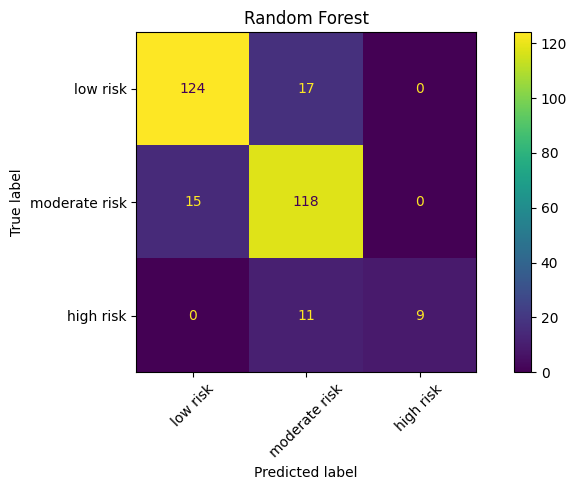

In [27]:
# === Model Random Forest ===
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
make_evaluation(y_test, y_pred_rf, title="Random Forest")

Hasil Training Model Random Forest
*   **Akurasi**: 85.4%
*   **Precision** tertinggi dimiliki oleh kategori low risk (1.00), yang artinya prediksi yang diberikan untuk low risk sangat tepat, meskipun jumlah data kategori ini kecil.
*   **Recall** rendah pada low risk (0.45) mengindikasikan banyak data low risk yang tidak terklasifikasi dengan benar — hanya 45% dari low risk yang berhasil dikenali oleh model.
*   Kinerja terbaik terlihat pada kategori moderate risk dan high risk, keduanya memiliki nilai **f1-score** 0.89.
*   Confusion matrix menunjukkan bahwa:
   *   Sebagian besar moderate risk dan low risk diklasifikasikan dengan benar.
   *   Terdapat kekeliruan dalam mengklasifikasikan high risk ke moderate risk (11 data).

## **Training Model Desicion Tree**

== Decision Tree ==
Akurasi: 0.786
               precision    recall  f1-score   support

     low risk       0.60      0.60      0.60        20
moderate risk       0.84      0.83      0.83       141
    high risk       0.76      0.77      0.76       133

     accuracy                           0.79       294
    macro avg       0.73      0.73      0.73       294
 weighted avg       0.79      0.79      0.79       294



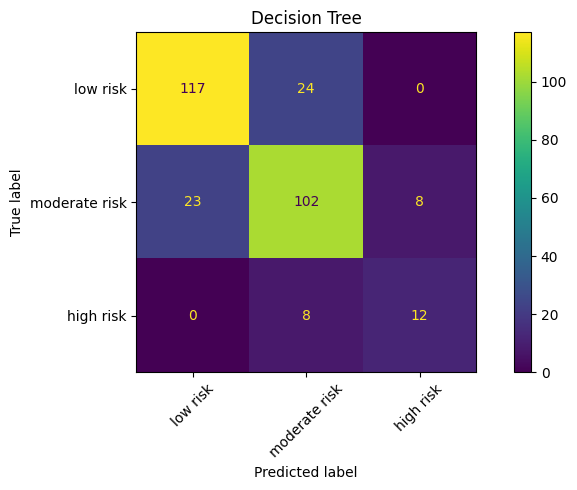

In [28]:
# === Model Decision Tree ===
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
make_evaluation(y_test, y_pred_dt, title="Decision Tree")


Hasil Training Model Random Forest
*  **Akurasi**: 78.6%
*  **Recall** untuk semua kelas lebih seimbang dibanding Random Forest (semuanya sekitar 0.77–0.83).
*  **Precision** terendah ada pada kategori low risk (0.60), mengindikasikan bahwa prediksi low risk sering salah.
*  **F1-score** tertinggi ada di moderate risk (0.83), menunjukkan keseimbangan yang baik antara precision dan recall.

*  Confusion matrix:
   *  Kategori low risk memiliki 24 kesalahan klasifikasi ke moderate risk.
   *  Beberapa moderate risk salah diklasifikasikan menjadi low atau high risk.
   *  Kategori high risk sering diklasifikasikan sebagai moderate risk.

In [29]:
# Perbandingan akurasi
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"Akurasi Random Forest: {acc_rf:.3f}")
print(f"Akurasi Decision Tree: {acc_dt:.3f}")

Akurasi Random Forest: 0.854
Akurasi Decision Tree: 0.786


📊 Hasil Perbandingan Model:

               Accuracy  Precision    Recall  F1 Score
Random Forest  0.853741   0.900102  0.738884  0.784094
Decision Tree  0.785714   0.732303  0.732235  0.732262


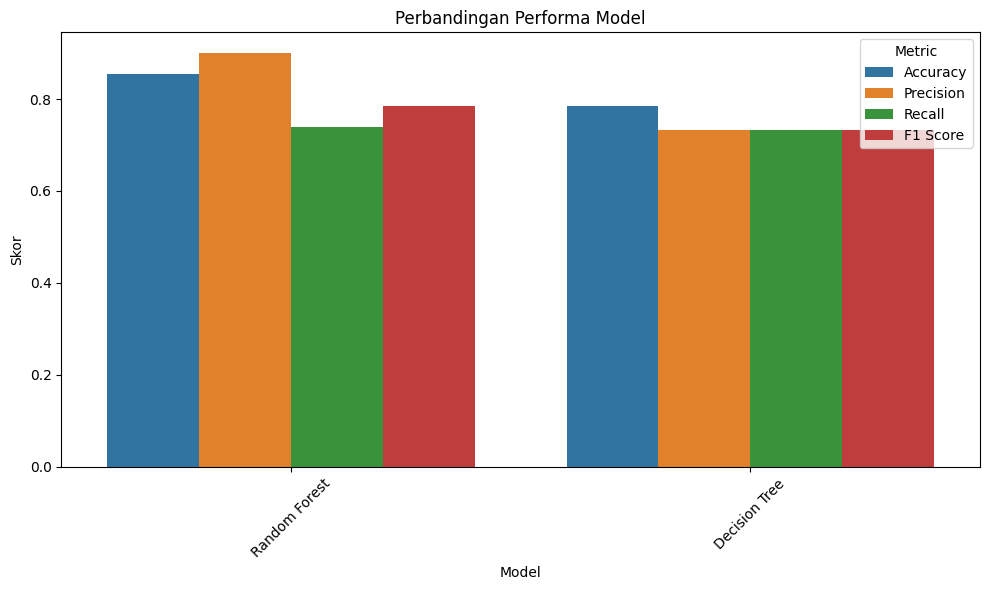

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary untuk menyimpan hasil evaluasi
model_scores = {}

# Fungsi evaluasi dan pencatatan skor
def evaluate_and_store(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Simpan skor dalam dictionary
    model_scores[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro')
    }

# Evaluasi semua model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_and_store(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_store(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")

# Menampilkan hasil perbandingan
import pandas as pd

results_df = pd.DataFrame(model_scores).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)  # Urutkan berdasarkan akurasi
print("📊 Hasil Perbandingan Model:\n")
print(results_df)

# Opsional: visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.title("Perbandingan Performa Model")
plt.xlabel("Model")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


Dari keempat metrik, Random Forest mengungguli Decision Tree dalam seluruh aspek. Hal ini menjadikan Random Forest sebagai model yang lebih baik secara keseluruhan.

Model Random Forest adalah model terbaik dalam studi ini karena mampu memberikan:
*   Akurasi yang tinggi
*   Precision yang sangat baik
*   Keseimbangan recall dan F1 score

# **Menjawab Permasalahan**

## **1. Bagaimana cara memanfaatkan informasi pola hidup guna memprediksi kategori diabetes pada seseorang?**

In [35]:
import numpy as np

def infer_diabetes_risk(model):
    print("Masukkan data berikut untuk memprediksi risiko diabetes Anda:\n")

    # Input
    height = float(input("Tinggi badan (cm): "))
    weight = float(input("Berat badan (kg): "))
    blood_glucose = float(input("Kadar gula darah puasa (mg/dL): "))
    sleep_hours = float(input("Berapa jam Anda tidur dalam sehari? "))
    physical_activity = float(input("Berapa lama Anda melakukan aktivitas fisik (menit/hari)? "))
    bmi = weight / (height ** 2) # BMI dihitung otomatis
    diet = int(input("Apakah Anda mengikuti pola diet sehat? (1=Ya, 0=Tidak): "))
    medication_adherence = int(input("Apakah Anda taat pada pengobatan? (1=Ya, 0=Tidak): "))
    stress_level = int(input("Tingkat stres Anda (0=Rendah, 1=Sedang, 2=Tinggi): "))
    hydration_level = int(input("Tingkat hidrasi Anda (0=Kurang, 1=Baik): "))

    # Susun fitur sesuai urutan data
    fitur_input = np.array([[height, weight, blood_glucose, sleep_hours, physical_activity, bmi, diet, medication_adherence, stress_level, hydration_level]])

    # Prediksi
    pred_label = model.predict(fitur_input)

    print("\n📊 Prediksi tingkat risiko diabetes Anda adalah:", pred_label[0])


In [36]:
infer_diabetes_risk(rf_model)

Masukkan data berikut untuk memprediksi risiko diabetes Anda:

Tinggi badan (cm): 170
Berat badan (kg): 65
Kadar gula darah puasa (mg/dL): 85
Berapa jam Anda tidur dalam sehari? 5
Berapa lama Anda melakukan aktivitas fisik (menit/hari)? 45
Apakah Anda mengikuti pola diet sehat? (1=Ya, 0=Tidak): 0
Apakah Anda taat pada pengobatan? (1=Ya, 0=Tidak): 1
Tingkat stres Anda (0=Rendah, 1=Sedang, 2=Tinggi): 0
Tingkat hidrasi Anda (0=Kurang, 1=Baik): 1

📊 Prediksi tingkat risiko diabetes Anda adalah: moderate risk


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Dengan menggunakan model machine learning yang telah kita buat, kita dapat menentukan kategori risiko diabetes seseorang berdasarkan informasi pola hidup yang dimasukkan. Model ini bekerja dengan memproses data seperti tinggi dan berat badan, kadar gula darah, durasi tidur, aktivitas fisik, pola diet, kepatuhan terhadap pengobatan, tingkat stres, dan status hidrasi.

Setelah pengguna memasukkan data tersebut, model akan menghitung nilai BMI dan menggabungkan seluruh variabel ke dalam sebuah struktur input yang sesuai. Kemudian, model akan mengklasifikasikan individu tersebut ke dalam salah satu dari tiga kategori risiko diabetes, yaitu:

*   Low Risk (Risiko Rendah),
*   Moderate Risk (Risiko Sedang), atau
*   High Risk (Risiko Tinggi).

## **2. Apa faktor-faktor yang paling berkontribusi terhadap peningkatan risiko diabetes?**

In [39]:
correlation_matrix = df_clean.corr(numeric_only=True)
cor_target = correlation_matrix['risk_score'].drop('risk_score').sort_values(ascending=False)

print("\n📊 Korelasi fitur terhadap 'risk_score':")
print(cor_target)

# Fitur paling berpengaruh (misalnya dengan korelasi absolut > 0.3)
important_features = cor_target[cor_target.abs() > 0.3]
print("\n🔥 Fitur dengan pengaruh signifikan (|korelasi| > 0.3):")
print(important_features)


📊 Korelasi fitur terhadap 'risk_score':
bmi                     0.393328
weight                  0.315743
stress_level            0.263283
blood_glucose           0.072178
sleep_hours            -0.028389
hydration_level        -0.158738
height                 -0.213537
diet                   -0.345858
physical_activity      -0.386423
medication_adherence   -0.495715
Name: risk_score, dtype: float64

🔥 Fitur dengan pengaruh signifikan (|korelasi| > 0.3):
bmi                     0.393328
weight                  0.315743
diet                   -0.345858
physical_activity      -0.386423
medication_adherence   -0.495715
Name: risk_score, dtype: float64


| **Fitur**              | **Korelasi** | **Interpretasi**                                                              |
|------------------------|--------------|-------------------------------------------------------------------------------|
| **bmi**                | +0.393       | Semakin tinggi BMI, semakin tinggi risiko diabetes.                          |
| **weight**             | +0.316       | Semakin besar berat badan, semakin tinggi risiko diabetes.                   |
| **diet**               | −0.346       | Pola diet sehat berkorelasi negatif, artinya mengurangi risiko diabetes.     |
| **physical_activity**  | −0.386       | Semakin banyak aktivitas fisik, semakin rendah risiko diabetes.              |
| **medication_adherence** | −0.496     | Kepatuhan terhadap pengobatan sangat menurunkan risiko diabetes.             |
